# Surface quality measurements using vedo in napari
This notebook shows how to visualize quantitatvie measurements on surface data in napari.

See also
* [vedo add_quality documentation](https://vedo.embl.es/autodocs/content/vedo/mesh.html#vedo.mesh.Mesh.addQuality)

In [1]:
import napari_process_points_and_surfaces as nppas

import napari
import numpy as np
import pandas as pd
from skimage.measure import label
from skimage.data import cells3d

In [2]:
viewer = napari.Viewer(ndisplay=3)

def hide_all(viewer):
    for layer in viewer.layers:
        layer.visible = False
        
def show_all(viewer):
    for layer in viewer.layers:
        layer.visible = True

The nppas gastruloid example is derived from AV Luque and JV Veenvliet (2023) which is licensed CC-BY (https://creativecommons.org/licenses/by/4.0/legalcode) and can be downloaded from here: https://zenodo.org/record/7603081


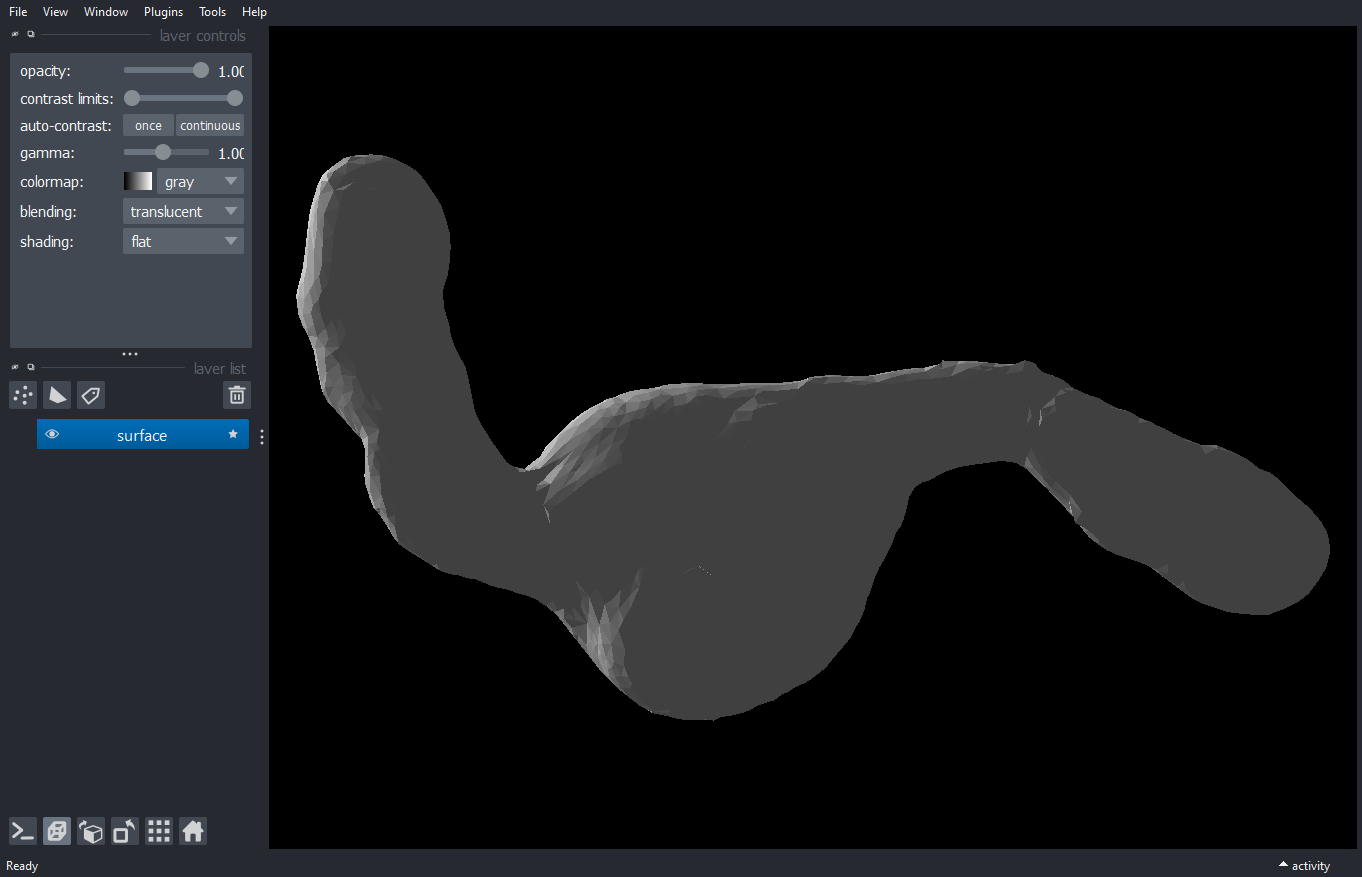

In [3]:
surface = nppas.gastruloid()

surface_layer = viewer.add_surface(surface, blending='translucent', shading='flat')
surface = surface_layer.data

napari.utils.nbscreenshot(viewer)

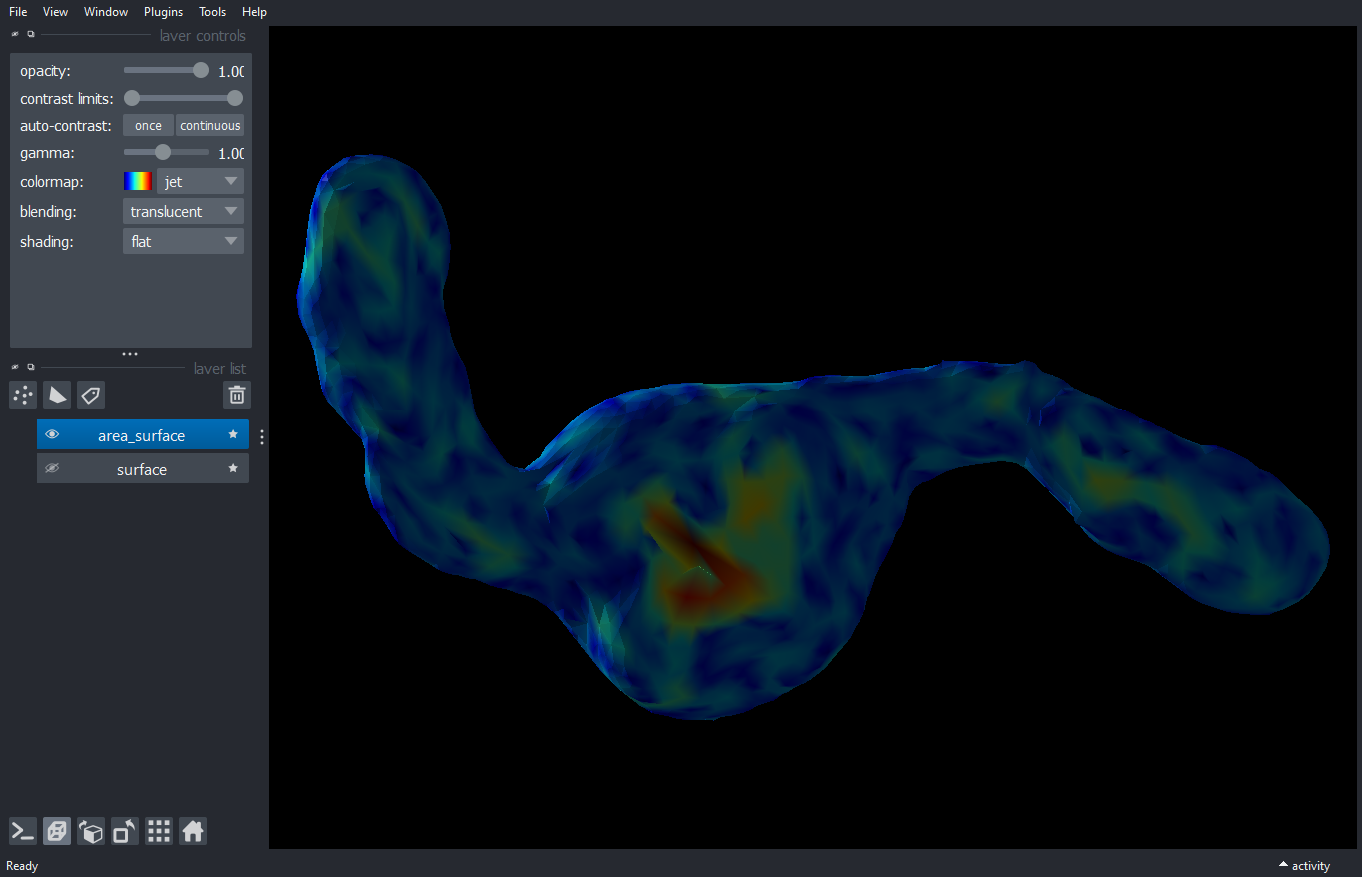

In [4]:
hide_all(viewer)

area_surface = nppas.add_quality(surface, quality_id=nppas.Quality.AREA)
viewer.add_surface(area_surface, colormap='jet')

napari.utils.nbscreenshot(viewer)

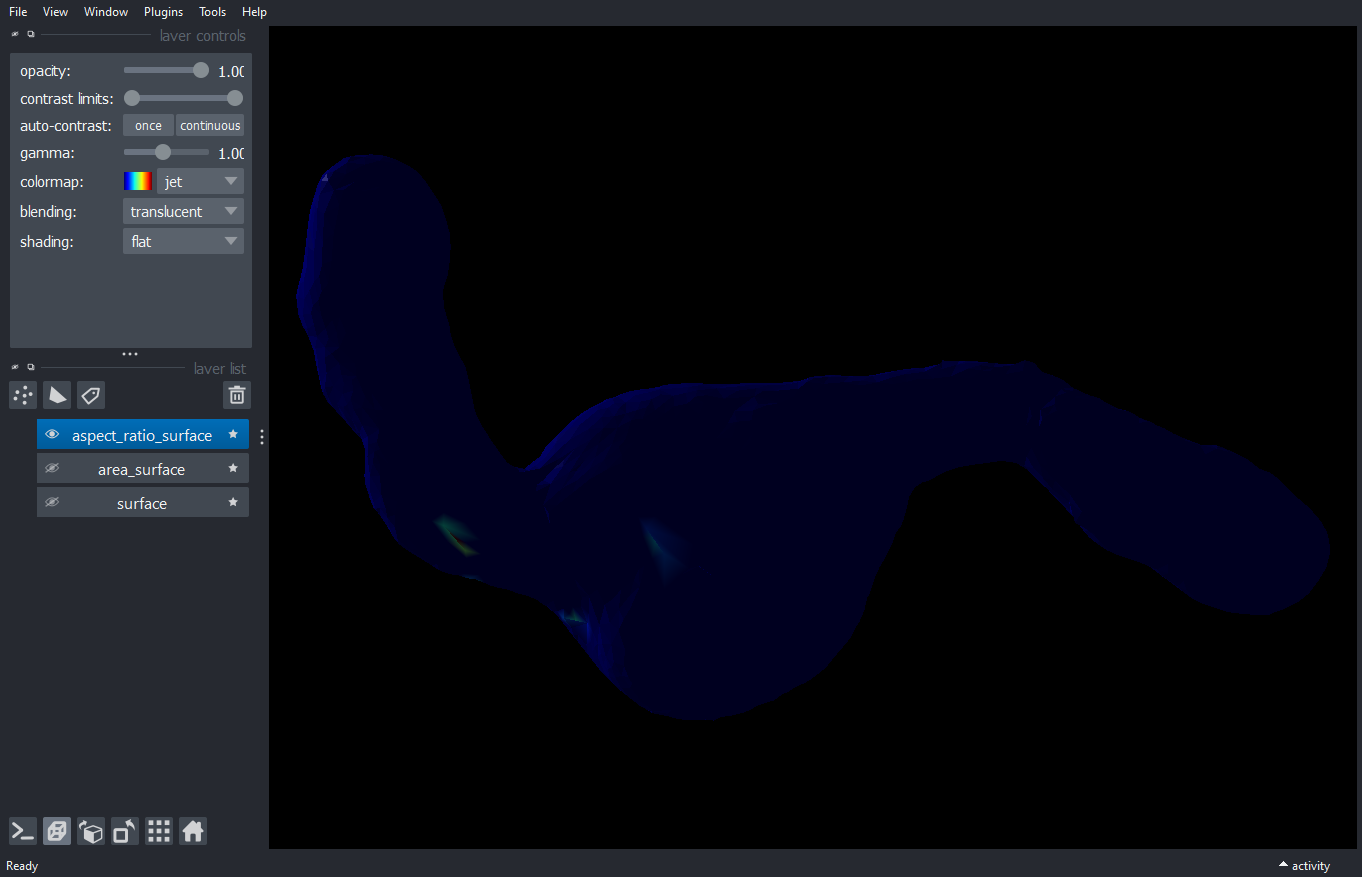

In [5]:
hide_all(viewer)

aspect_ratio_surface = nppas.add_quality(surface, quality_id=nppas.Quality.ASPECT_RATIO)
viewer.add_surface(aspect_ratio_surface, colormap='jet')

napari.utils.nbscreenshot(viewer)

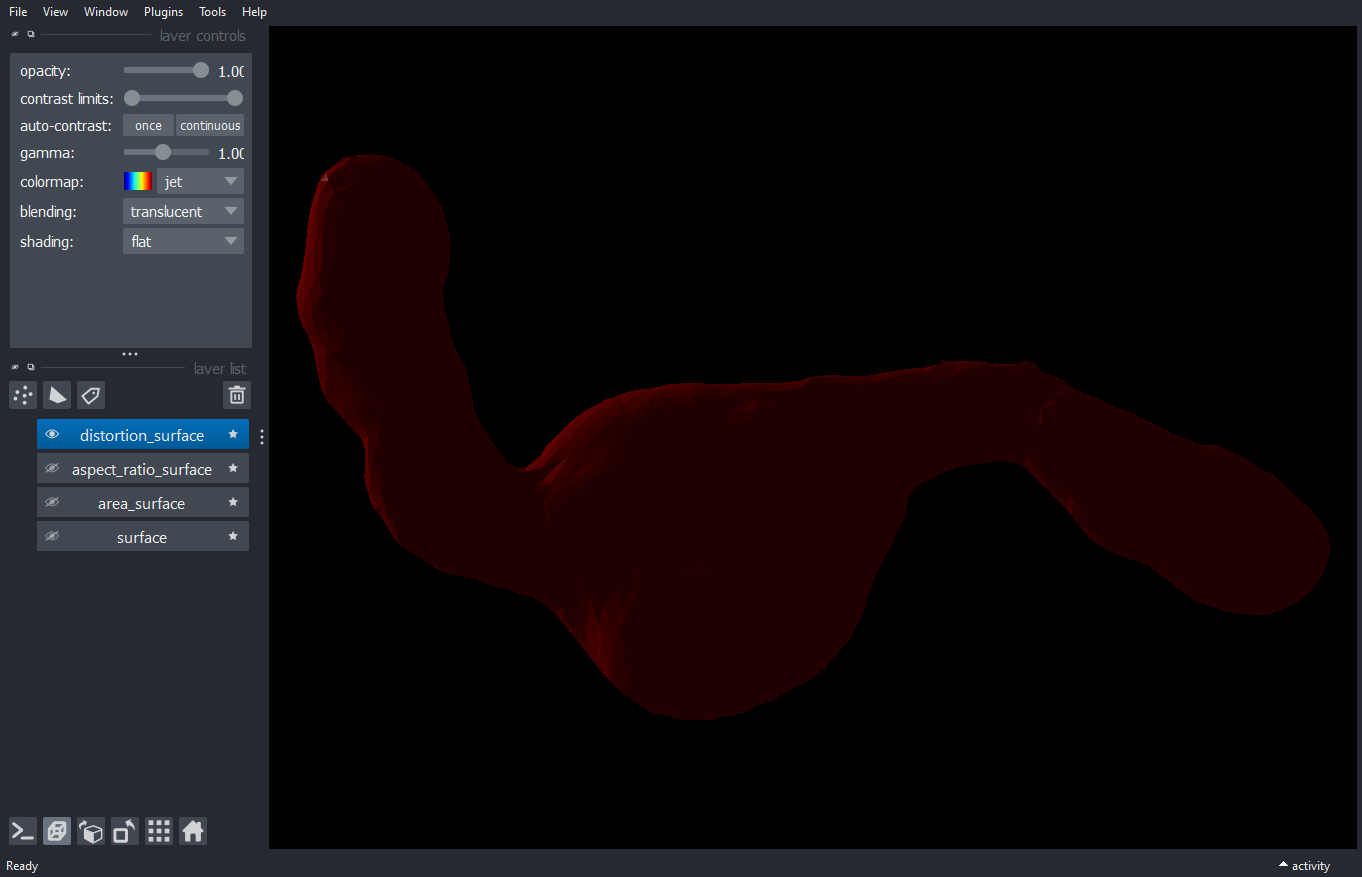

In [6]:
hide_all(viewer)

distortion_surface = nppas.add_quality(surface, quality_id=nppas.Quality.DISTORTION)
viewer.add_surface(distortion_surface, colormap='jet')

napari.utils.nbscreenshot(viewer)

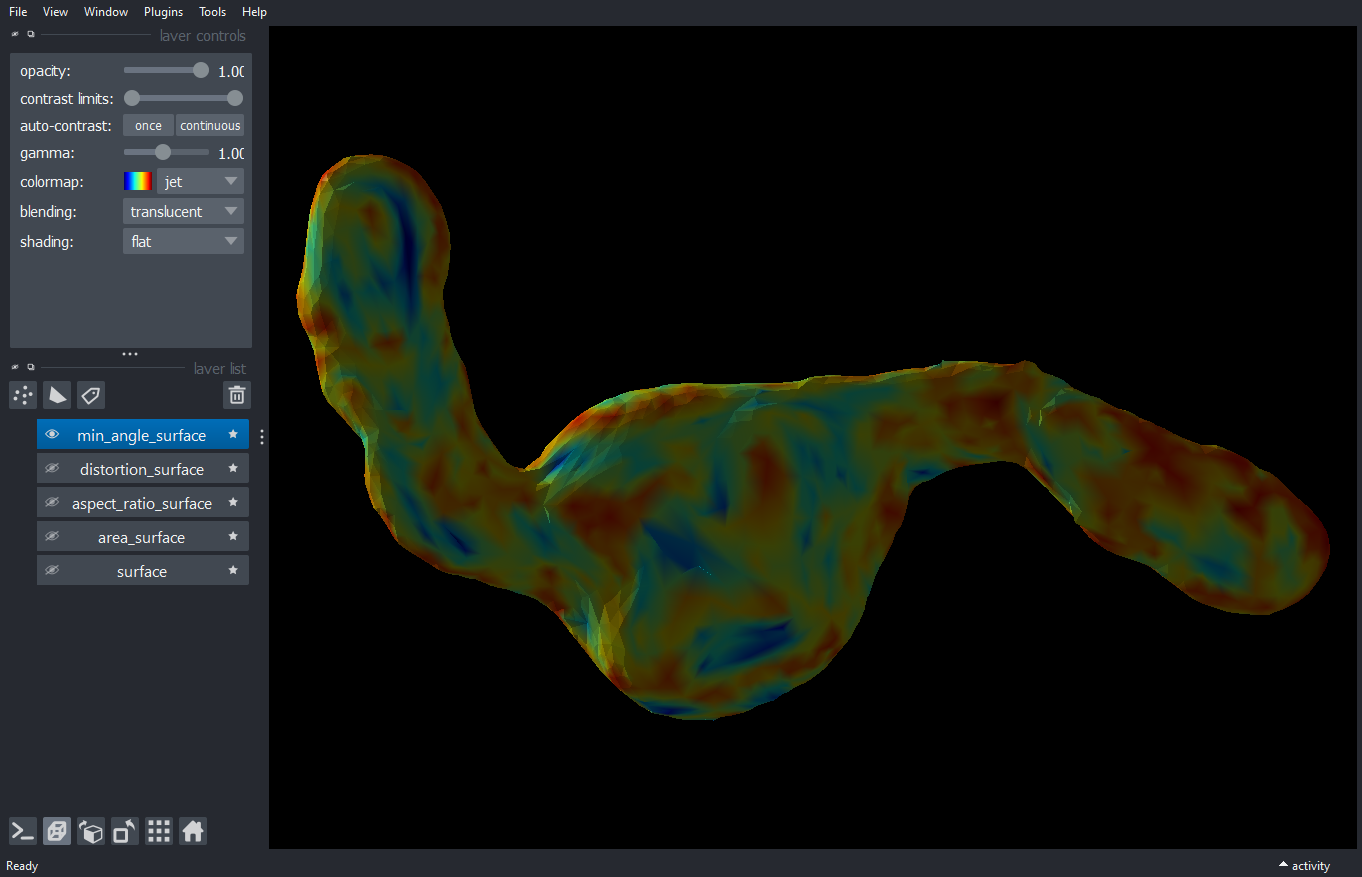

In [7]:
hide_all(viewer)

min_angle_surface = nppas.add_quality(surface, quality_id=nppas.Quality.MIN_ANGLE)
viewer.add_surface(min_angle_surface, colormap='jet')

napari.utils.nbscreenshot(viewer)

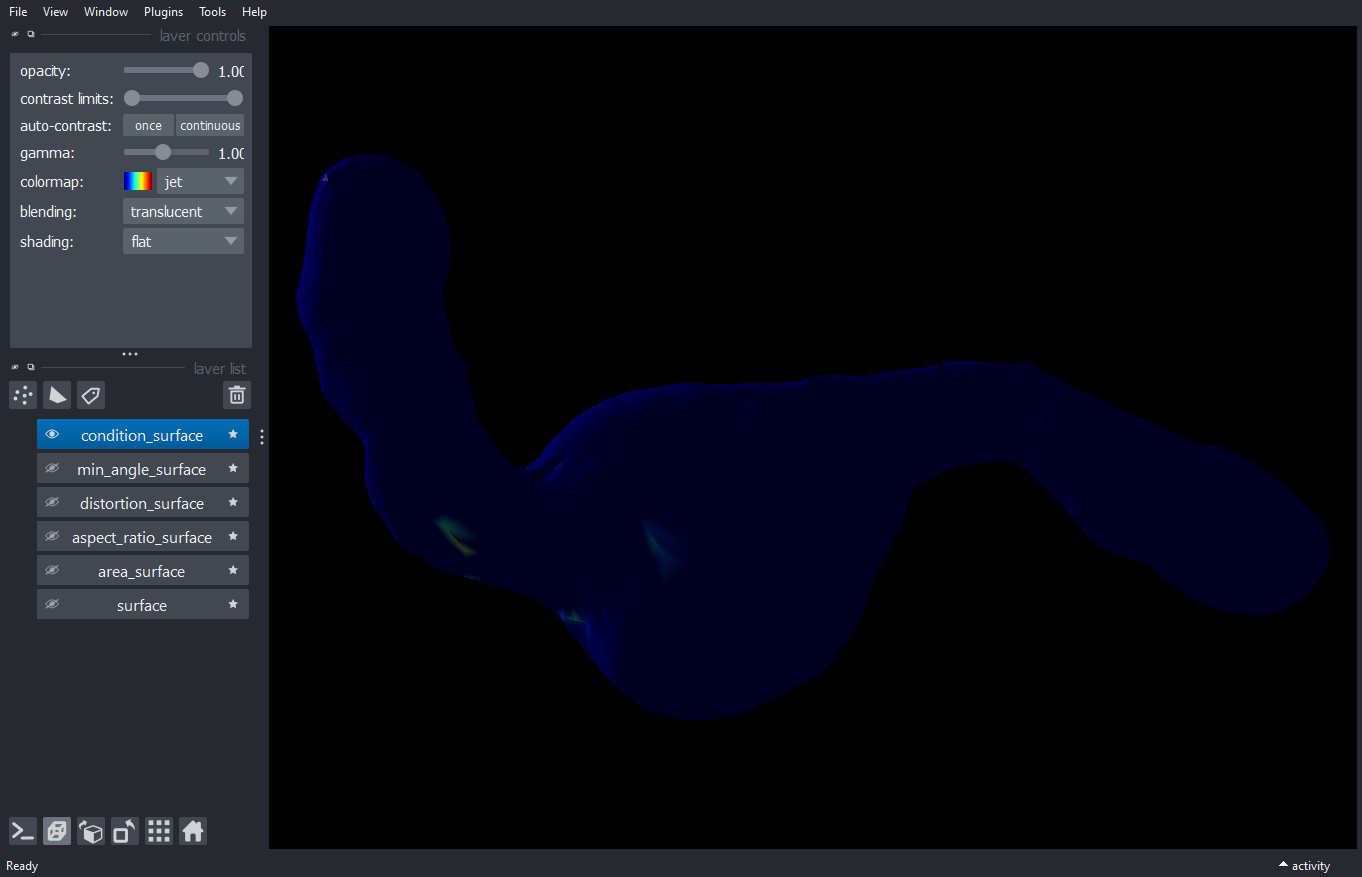

In [8]:
hide_all(viewer)

condition_surface = nppas.add_quality(surface, quality_id=nppas.Quality.CONDITION)
viewer.add_surface(condition_surface, colormap='jet')

napari.utils.nbscreenshot(viewer)

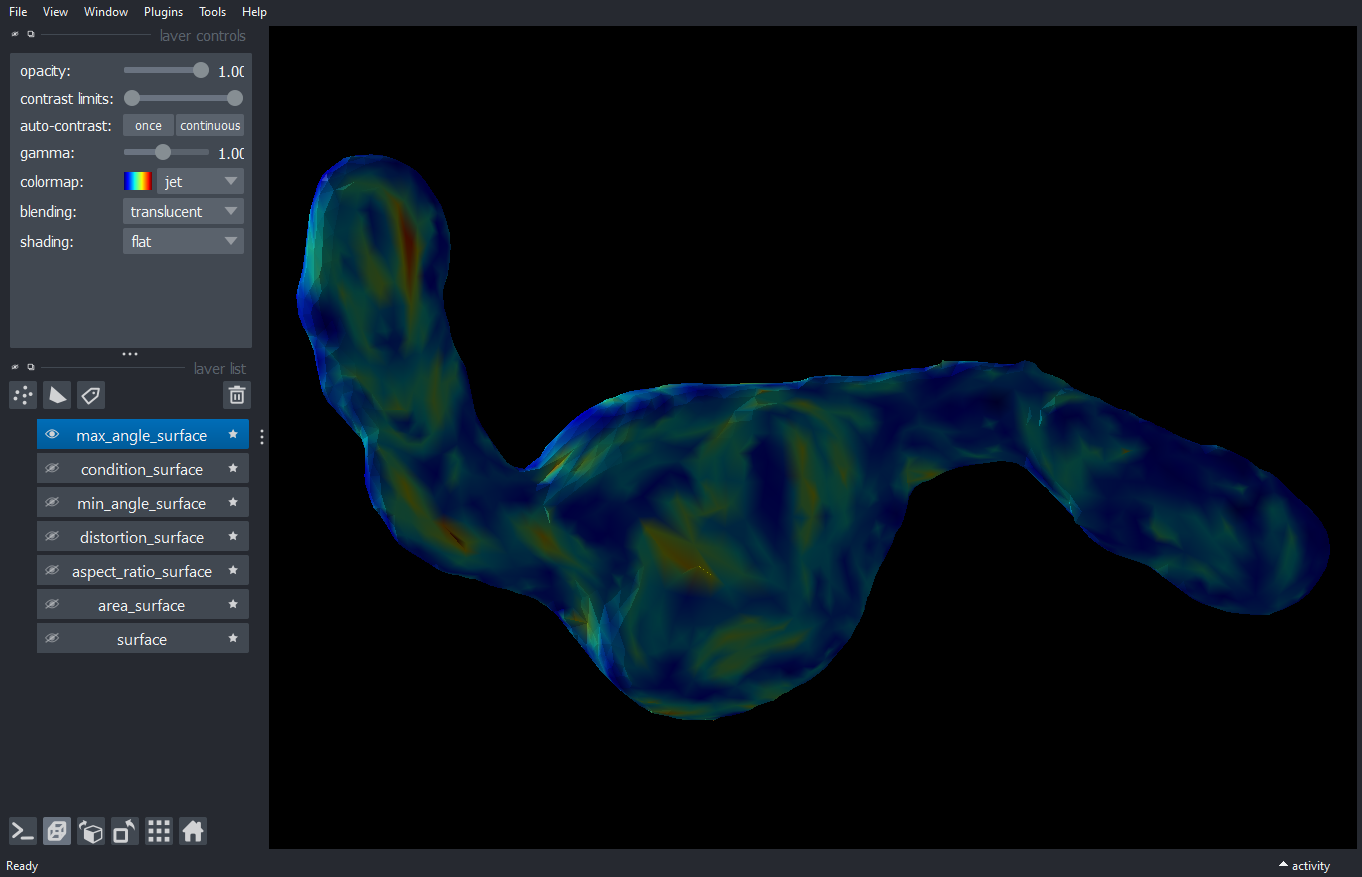

In [9]:
hide_all(viewer)

max_angle_surface = nppas.add_quality(surface, quality_id=nppas.Quality.MAX_ANGLE)
viewer.add_surface(max_angle_surface, colormap='jet')

napari.utils.nbscreenshot(viewer)

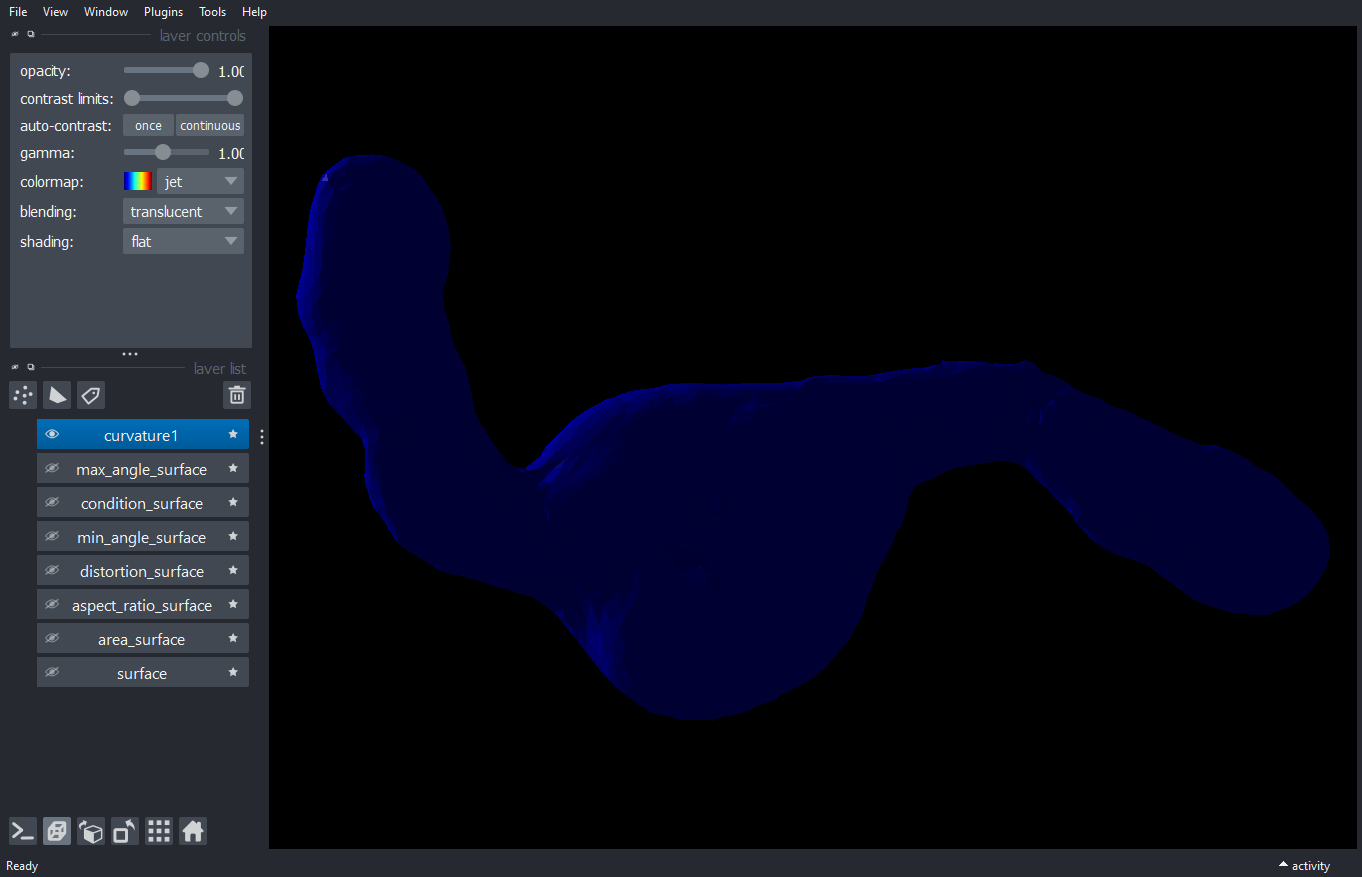

In [10]:
hide_all(viewer)

curvature1 = nppas.add_quality(surface, quality_id=nppas.Quality.MEAN_CURVATURE)
viewer.add_surface(curvature1, colormap='jet')

napari.utils.nbscreenshot(viewer)

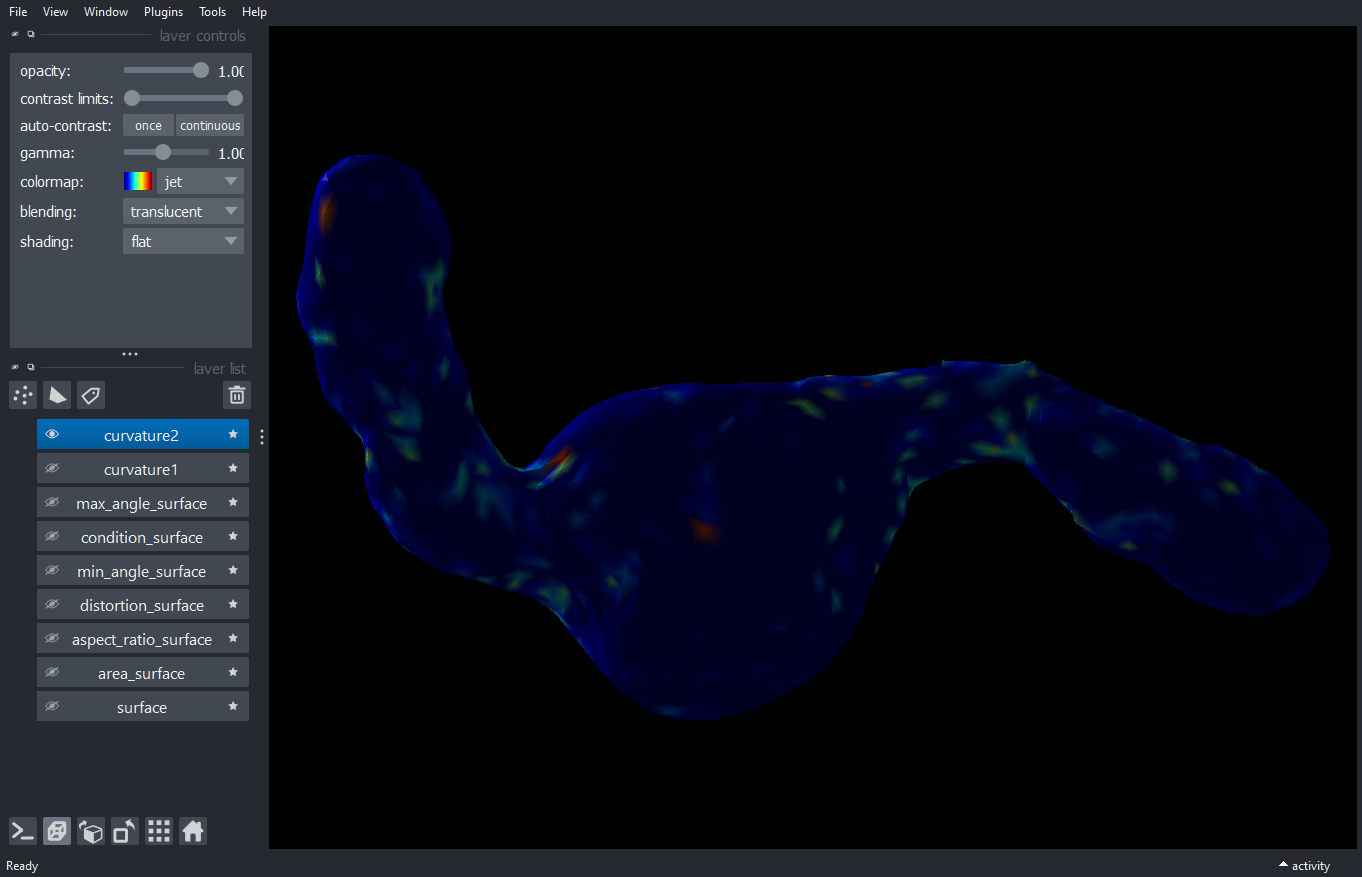

In [11]:
hide_all(viewer)

curvature2 = nppas.add_quality(surface, quality_id=nppas.Quality.SPHERE_FITTED_CURVATURE_DECA_VOXEL)
viewer.add_surface(curvature2, colormap='jet')

napari.utils.nbscreenshot(viewer)

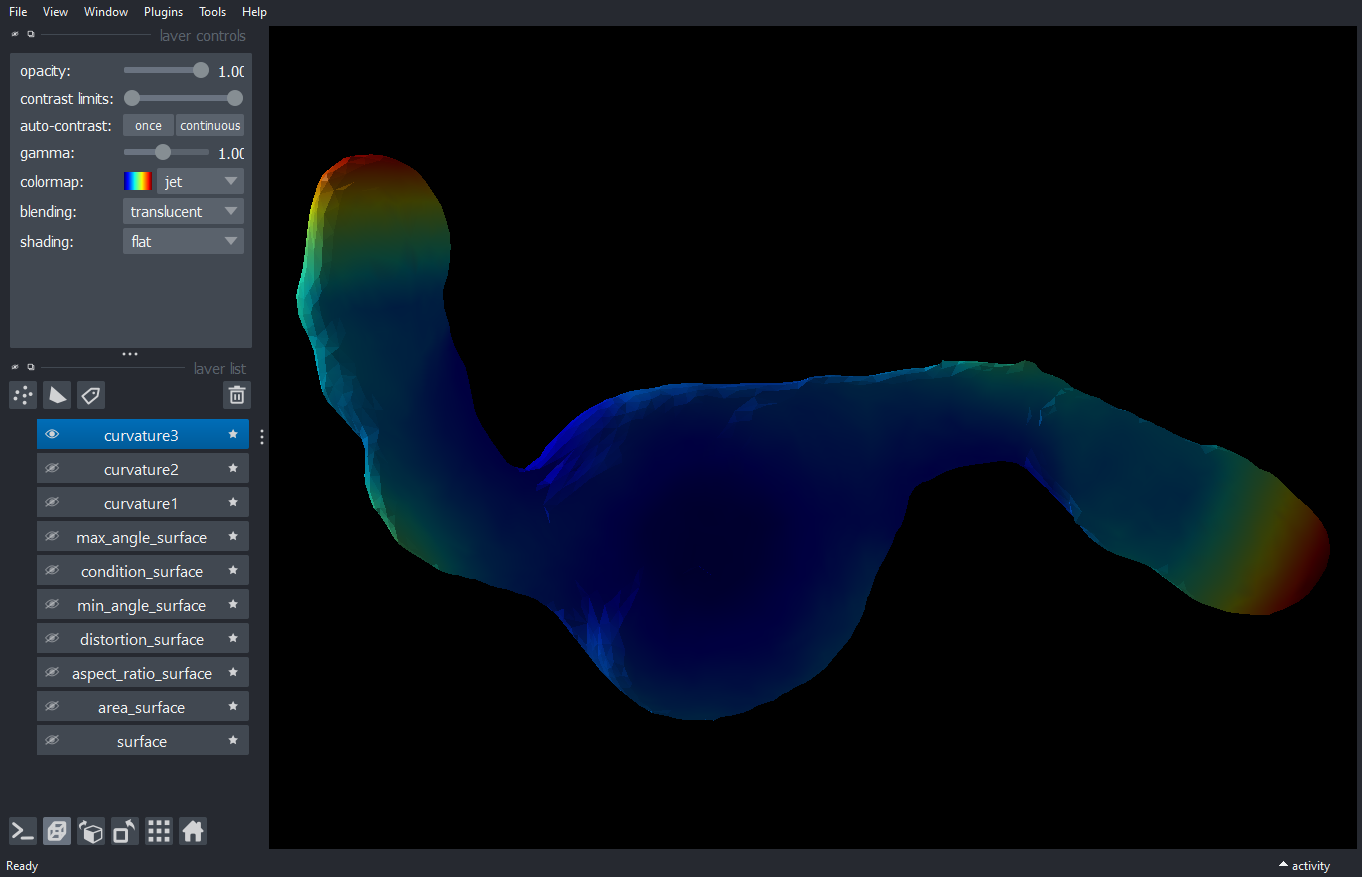

In [12]:
hide_all(viewer)

curvature3 = nppas.add_quality(surface, quality_id=nppas.Quality.SPHERE_FITTED_CURVATURE_HECTA_VOXEL)
viewer.add_surface(curvature3, colormap='jet')

napari.utils.nbscreenshot(viewer)

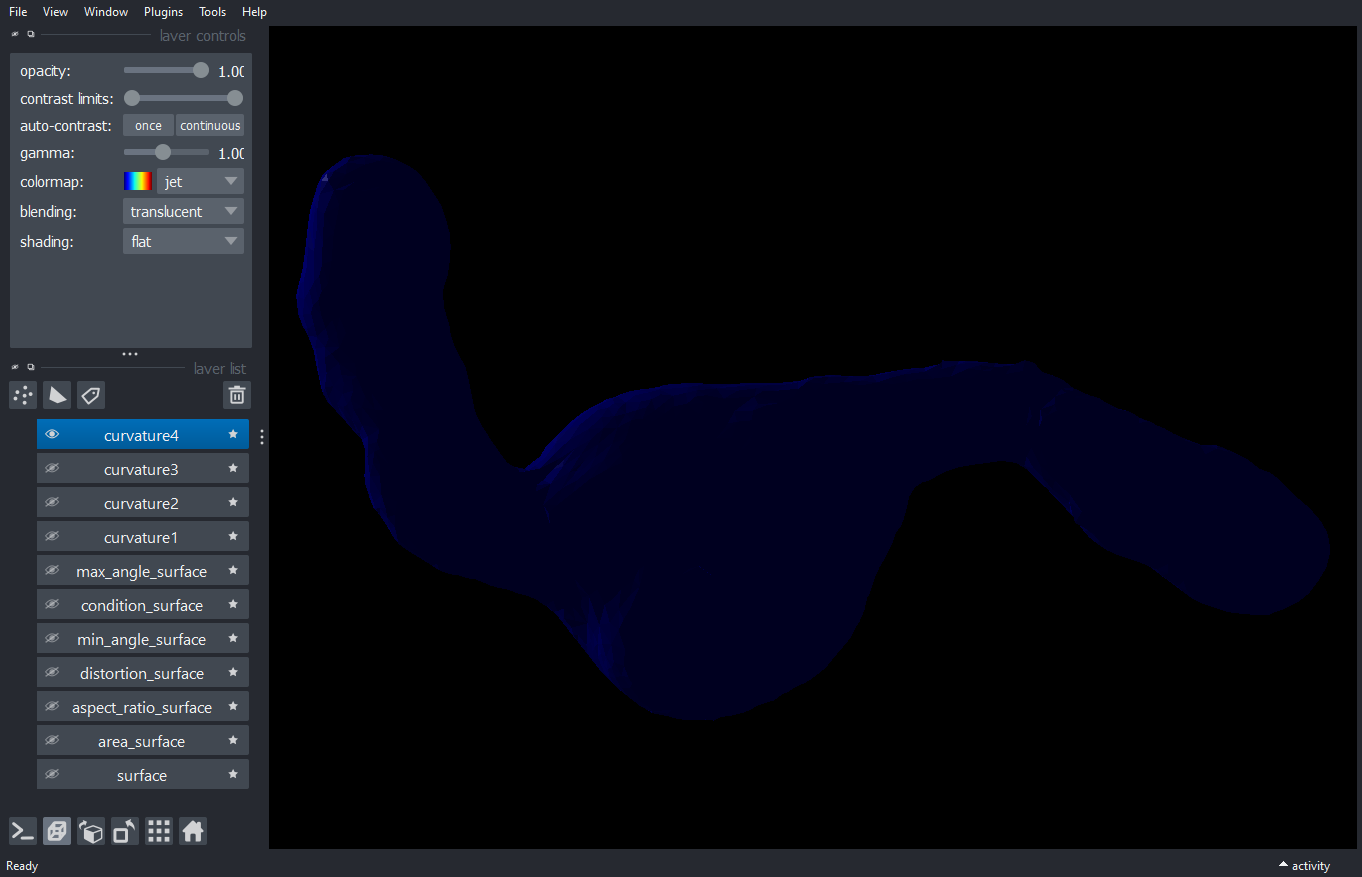

In [13]:
hide_all(viewer)

curvature4 = nppas.add_quality(surface, quality_id=nppas.Quality.SPHERE_FITTED_CURVATURE_KILO_VOXEL)
viewer.add_surface(curvature4, colormap='jet')

napari.utils.nbscreenshot(viewer)

## Reading out values
After measurements have been visualized, you can read them out:

In [14]:
vertices, faces, values = viewer.layers[-1].data

table = {
    "X": vertices[:,2],
    "Y": vertices[:,1],
    "Z": vertices[:,0],
    "value":values
}

pd.DataFrame(table)

,X,Y,Z,value
0,224.082855,220.405991,14.174363,0.000019
1,220.321533,208.158768,13.983076,0.000019
2,229.455795,219.060226,14.819012,0.000019
3,209.542557,150.734894,14.348864,0.000019
4,214.309753,145.722107,14.344353,0.000019
...,...,...,...,...
3319,428.314514,349.007416,112.390945,0.000019
3320,412.195129,354.458801,112.101349,0.000019
3321,430.368317,356.983643,112.182083,0.000019
3322,421.842499,360.458557,112.378403,0.000019


## Other mesh quality measurements
There are more mesh quality measurements available. Not all work on all meshes. Watch out for an error message in a grey window.

In [15]:
for q in nppas.Quality:
    print(q)

Quality.EDGE_RATIO
Quality.ASPECT_RATIO
Quality.RADIUS_RATIO
Quality.ASPECT_FROBENIUS
Quality.MED_ASPECT_FROBENIUS
Quality.MAX_ASPECT_FROBENIUS
Quality.MIN_ANGLE
Quality.COLLAPSE_RATIO
Quality.MAX_ANGLE
Quality.CONDITION
Quality.SCALED_JACOBIAN
Quality.SHEAR
Quality.RELATIVE_SIZE_SQUARED
Quality.SHAPE
Quality.SHAPE_AND_SIZE
Quality.DISTORTION
Quality.MAX_EDGE_RATIO
Quality.SKEW
Quality.TAPER
Quality.VOLUME
Quality.STRETCH
Quality.DIAGONAL
Quality.DIMENSION
Quality.ODDY
Quality.SHEAR_AND_SIZE
Quality.JACOBIAN
Quality.WARPAGE
Quality.ASPECT_GAMMA
Quality.AREA
Quality.ASPECT_BETA
Quality.GAUSS_CURVATURE
Quality.MEAN_CURVATURE
Quality.MAXIMUM_CURVATURE
Quality.MINIMUM_CURVATURE
Quality.SPHERE_FITTED_CURVATURE_1_PERCENT
Quality.SPHERE_FITTED_CURVATURE_2_PERCENT
Quality.SPHERE_FITTED_CURVATURE_5_PERCENT
Quality.SPHERE_FITTED_CURVATURE_10_PERCENT
Quality.SPHERE_FITTED_CURVATURE_25_PERCENT
Quality.SPHERE_FITTED_CURVATURE_50_PERCENT
Quality.SPHERE_FITTED_CURVATURE_MICRO_VOXEL
Quality.SPHERE_FIT

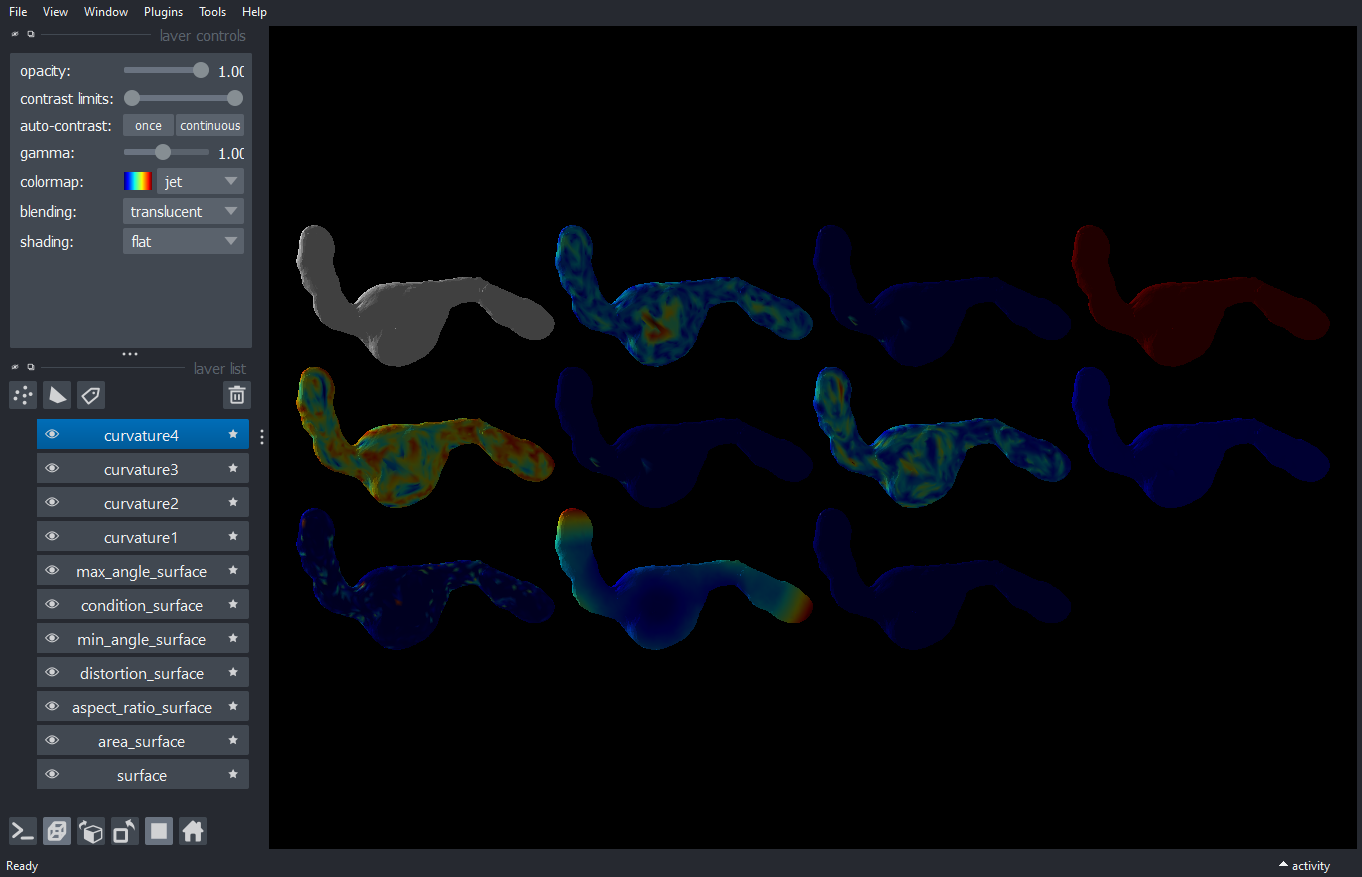

In [16]:
show_all(viewer)
viewer.grid.enabled = True
viewer.grid.stride = -1
napari.utils.nbscreenshot(viewer)